In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
traindata = pd.read_csv("/Users/Quan/Documents/salesData.csv")

In [4]:
traindata["total_price"] = traindata["item_price"] * traindata["item_cnt_day"]

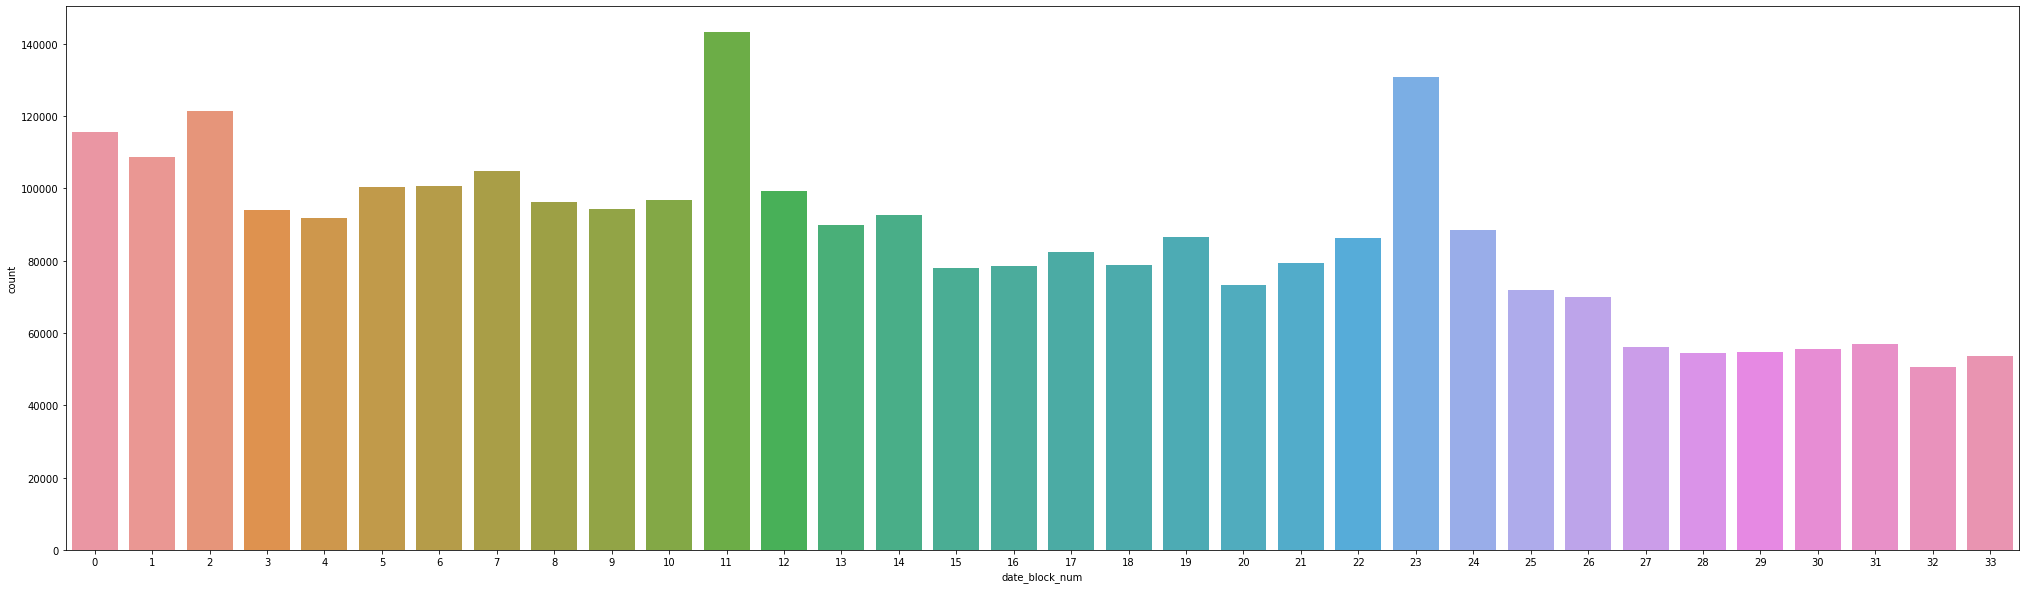

In [5]:
#This plot shows the number of sales for each month
plt.figure(figsize=(35,10))
sns.countplot(x='date_block_num', data=traindata);
plt.show()

Notice that December 2013 and December 2014 have the highest number of sales. This is expected because we assume that it is directly associated with the Christmas season. December 2013 had a higher number of sales than December 2014. 

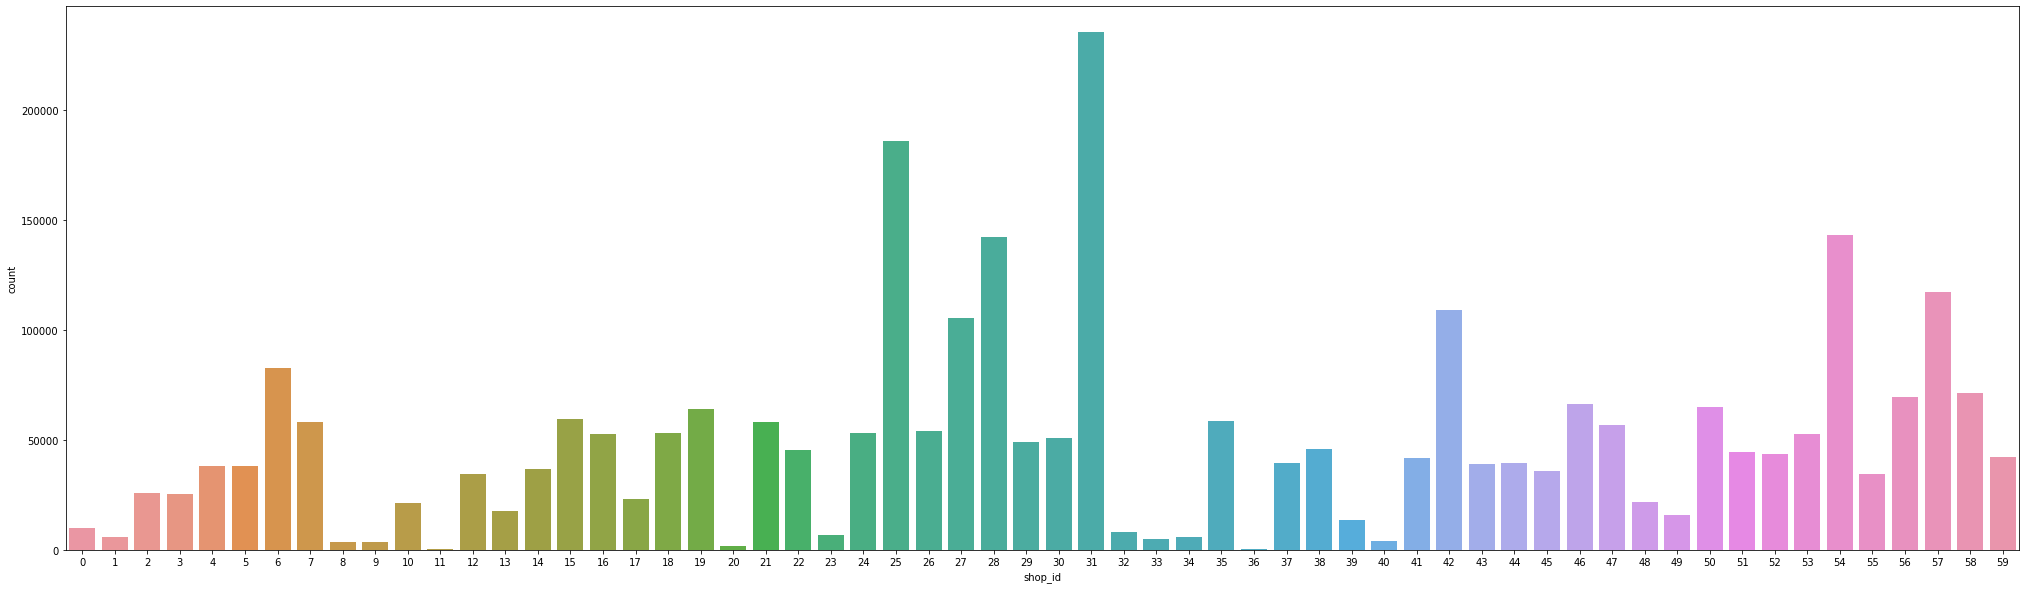

In [6]:
# This plot shows the number of sales for each shop
plt.figure(figsize=(35,10))
sns.countplot(x='shop_id', data=traindata)
plt.show()

Shop 31 has the highest number of sales. 

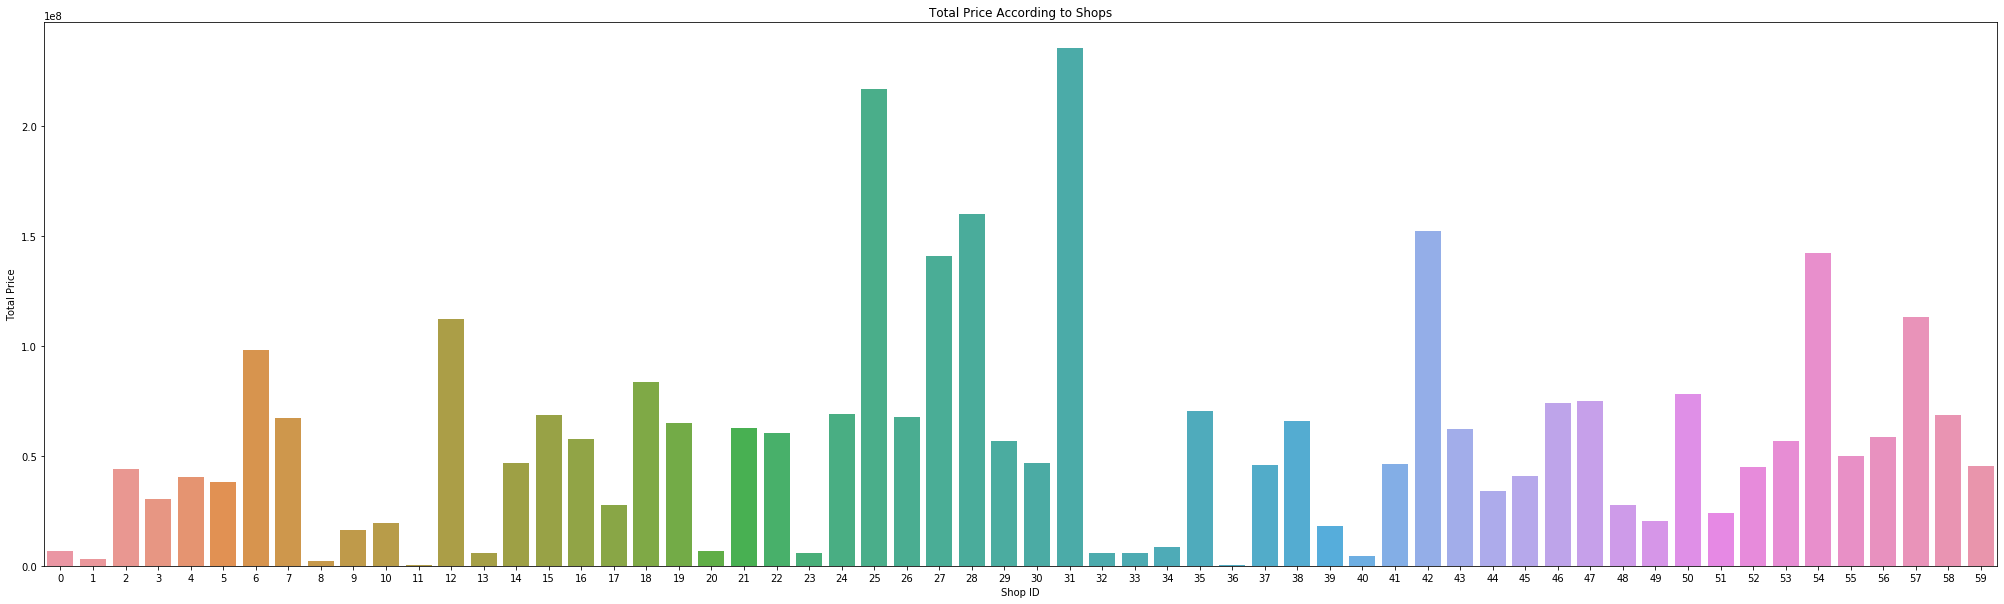

In [7]:
sales_total_price = pd.DataFrame(traindata.groupby(['shop_id'])['total_price'].sum().reset_index())
plt.figure(figsize=(35,10))
sns.barplot(x="shop_id", y="total_price", data=sales_total_price , order=sales_total_price['shop_id'])
plt.xlabel('Shop ID')
plt.ylabel('Total Price')
plt.title('Total Price According to Shops')
plt.show()

Total Revenue of each shop. Shop 31 has the highest revenue. 

In [8]:
traindata['date'] = pd.to_datetime(traindata['date'], format='%d.%m.%Y')
traindata['month'] = traindata['date'].dt.month
traindata['year'] = traindata['date'].dt.year

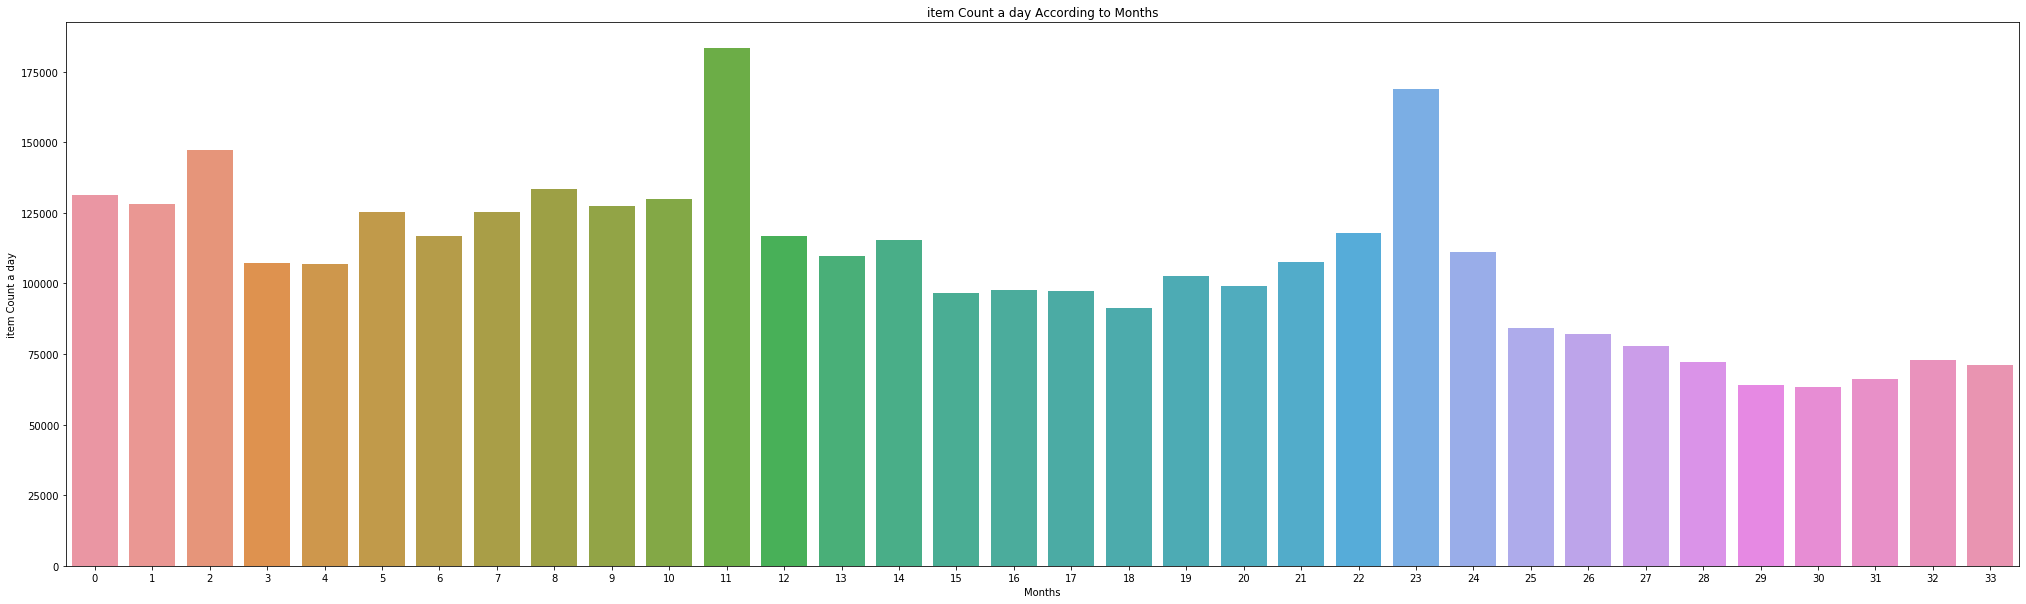

In [9]:
monthly_sales = pd.DataFrame(traindata.groupby(['date_block_num'])['item_cnt_day'].sum().reset_index())
plt.figure(figsize=(35,10))
sns.barplot(x="date_block_num", y="item_cnt_day", data=monthly_sales , order=monthly_sales['date_block_num'])
plt.xlabel('Months')
plt.ylabel('item Count a day')
plt.title('item Count a day According to Months')
plt.show()

Monthly Number of Sales

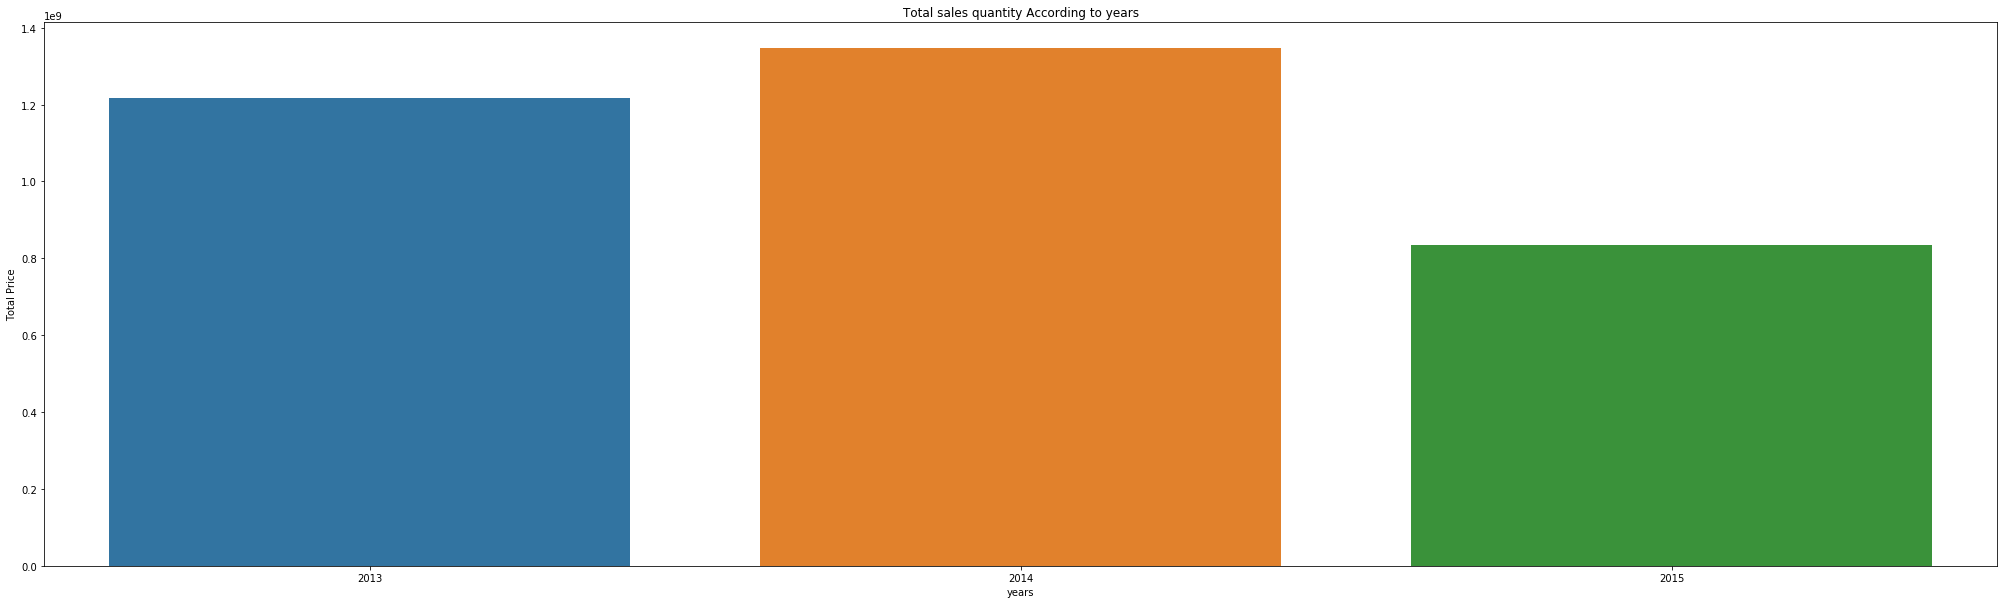

In [10]:
sales_total_price = pd.DataFrame(traindata.groupby(['year'])['total_price'].sum().reset_index())
plt.figure(figsize=(35,10))
sns.barplot(x="year", y="total_price", data=sales_total_price , order=sales_total_price['year'])
plt.xlabel('years')
plt.ylabel('Total Price')
plt.title('Total sales quantity According to years')
plt.show()

2014 generated the most money

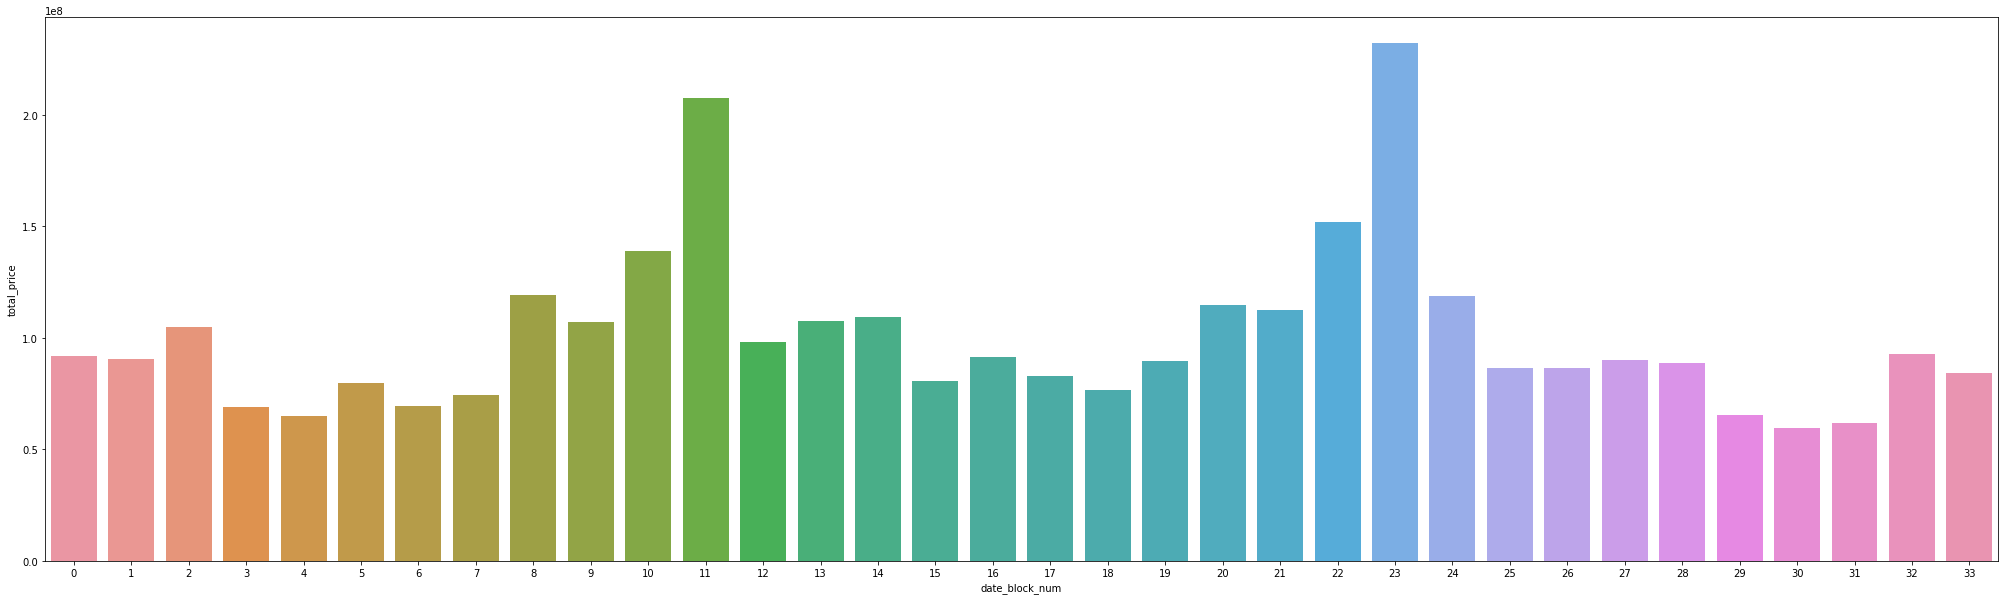

In [11]:
sales_train_monthly_total_price = pd.DataFrame(traindata.groupby(['date_block_num'])['total_price'].sum().reset_index().sort_values('total_price'))
plt.figure(figsize=(35,10))
sns.barplot(x="date_block_num", y="total_price", data=sales_train_monthly_total_price, order= monthly_sales['date_block_num'])

We see that the Revenue is also peaking in Decembers due to the holidays. Revenue in December 2014 is greater December 2013. This is contrary to the number of items sold. December 2013 had a higher number of sales. 

In [6]:
sales_train_shop = pd.DataFrame(traindata.groupby(['shop_id','item_id'])['item_cnt_day'].sum().reset_index().sort_values('item_cnt_day'))
#plt.figure(figsize=(35,10))
#sns.barplot(x="shop_id", y="item_cnt_day", data=sales_train_shop, order=sales_train_shop['shop_id'])

Shop 31 is selling highest number of items